In [48]:
import math
from visualisation import visualise_features, visualise_dataset
from utilities import load_dataframe, performance, cross_validation_feature_params

In [49]:
# Restart the kernel if needed
# import os
# os._exit(00)

## Exploratory Data Analysis
### Visualise our data

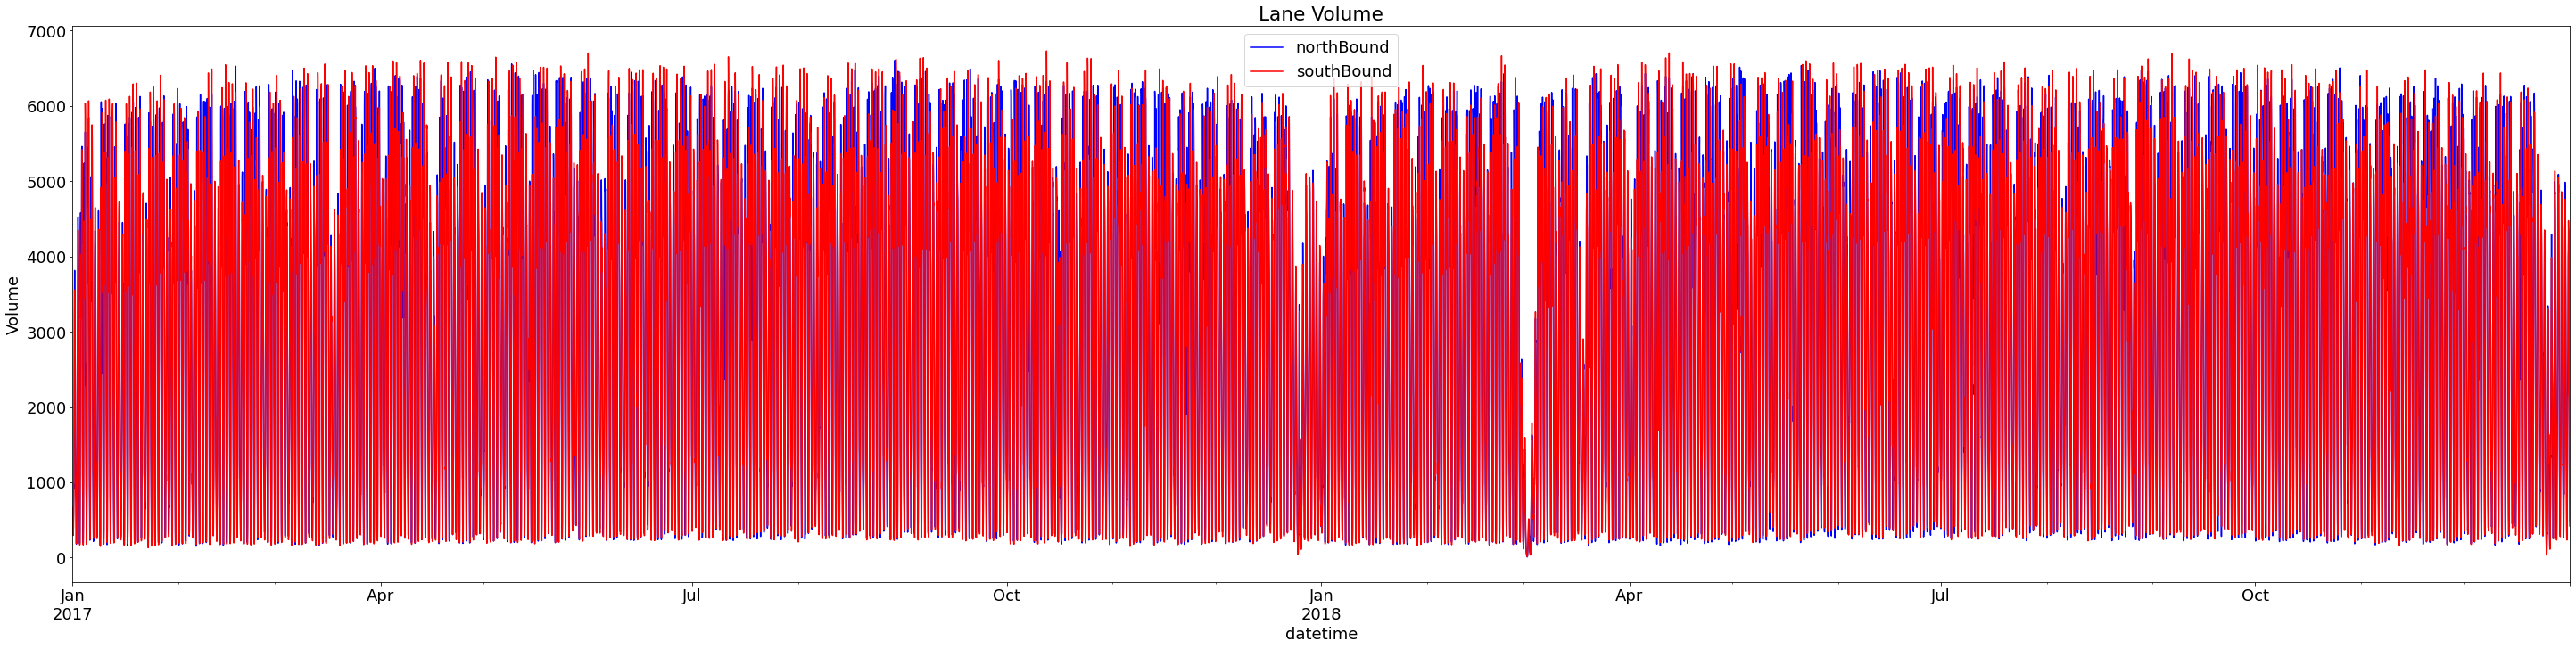

In [50]:
# Get our dataframe
df = load_dataframe()
visualise_dataset(df)

This doesn't tell us a huge amount. Let's split the volume directions up into separate dataframes and have a closer look.

In [51]:
# Create two separate data frames, one for each junction
df_north = df.drop(columns=["southBound"])
df_south = df.drop(columns=["northBound"])

For each dataframe, let's look at a seasonality and trend plot. This could illuminate some more details to us

Base MSE for northBound traffic is: 509.44811647048687
Base MSE for southBound traffic is: 511.3737378829474


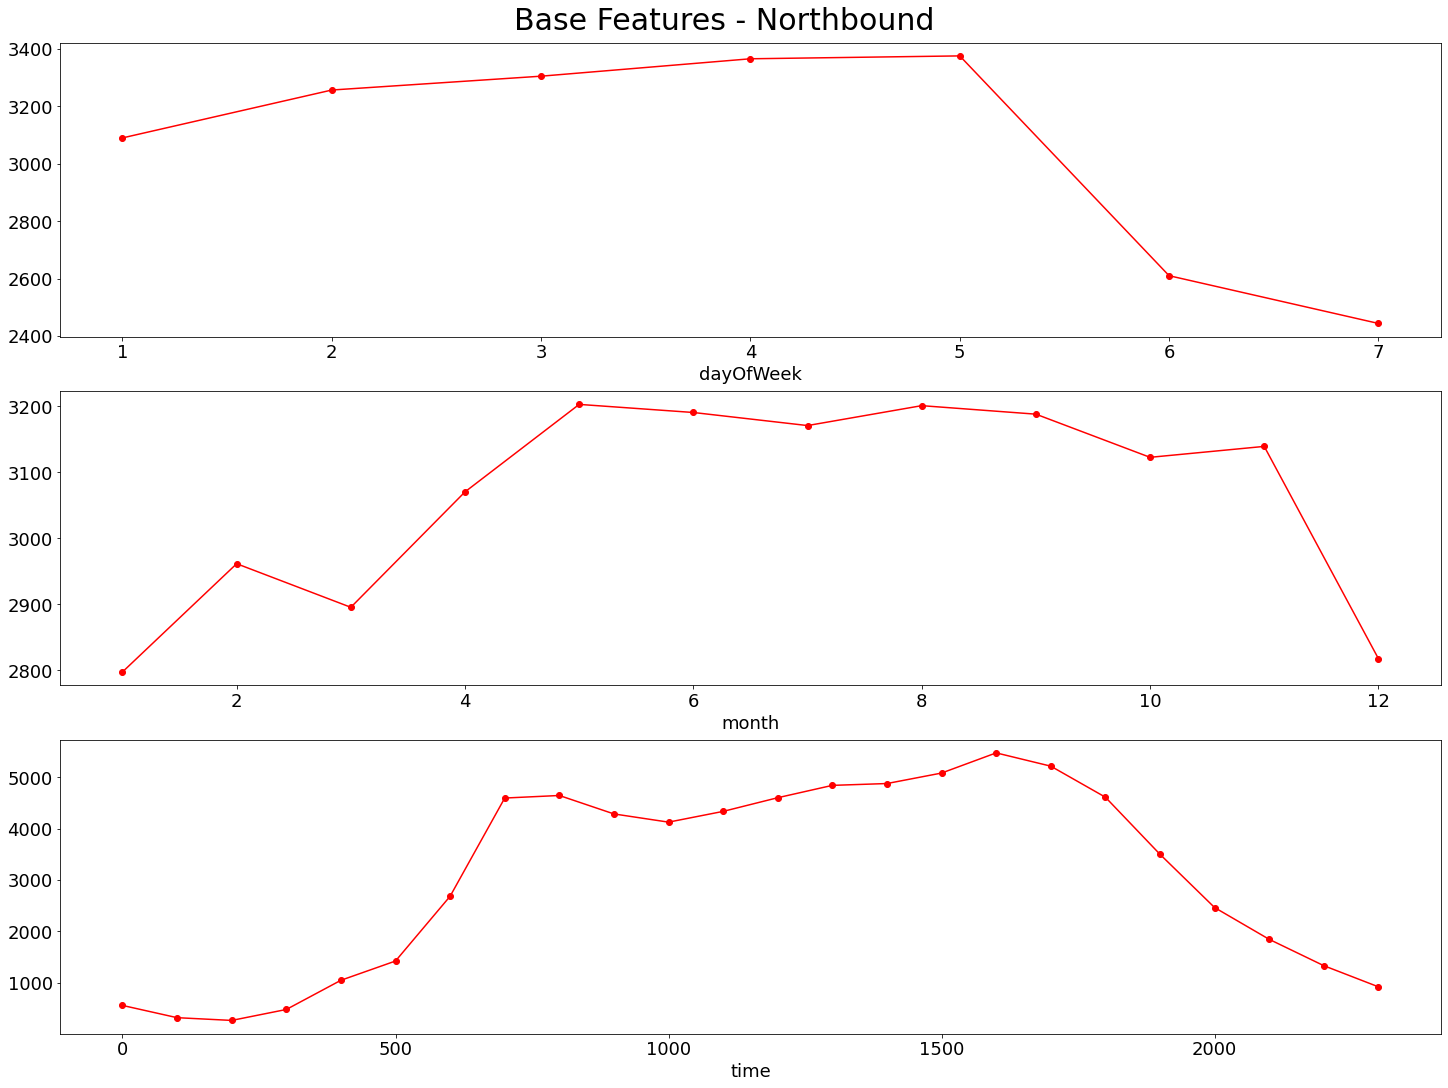

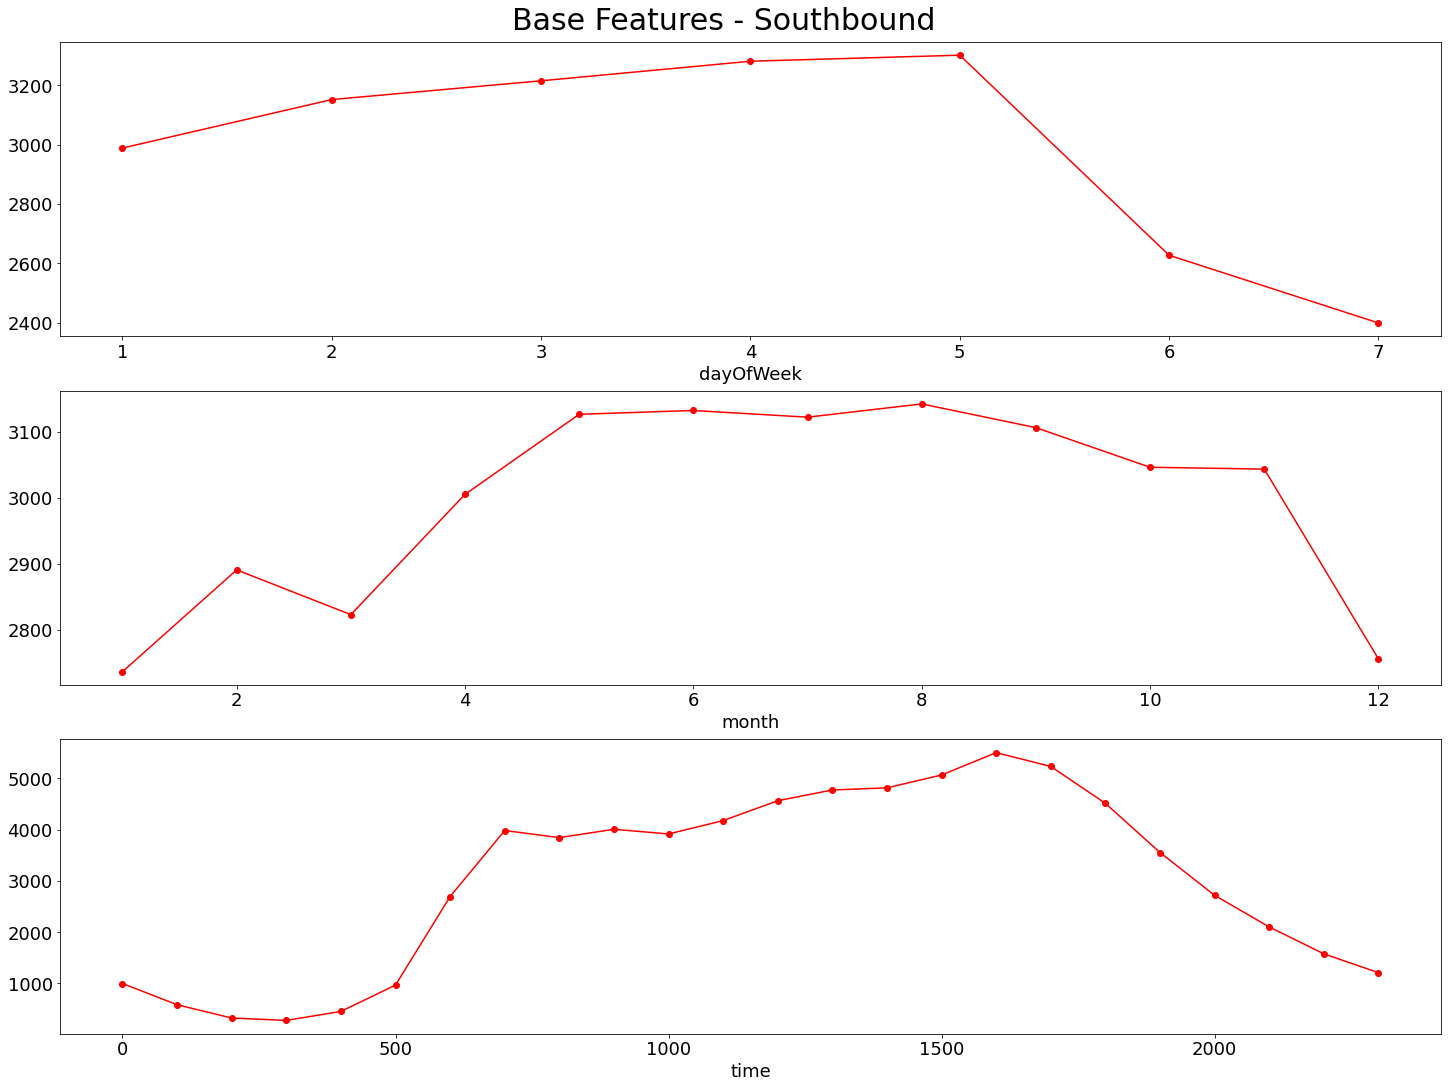

In [52]:
# Base features performance, where we use K Nearest Neighbors.
# Here is our baseline, now we add features.
performance(df_north, "northBound")
visualise_features(["dayOfWeek", "month", "time"], df_north, f"Base Features - Northbound", "northBound")

performance(df_south, "southBound")
visualise_features(["dayOfWeek", "month", "time"], df_south, f"Base Features - Southbound", "southBound")

### We see:
1. A weekly seasonality
2. A yearly seasonality
3. No overall trend throughout the year

### Extra Features

In [53]:
df_north["quarter"] = df.index.quarter
df_north["weekOfYear"] = df.index.weekofyear
df_north["dayOfYear"] = df.index.dayofyear

df_south["quarter"] = df.index.quarter
df_south["weekOfYear"] = df.index.weekofyear
df_south["dayOfYear"] = df.index.dayofyear

C:\Users\user\AppData\Local\Temp/ipykernel_17276/3101943268.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_north["weekOfYear"] = df.index.weekofyear
C:\Users\user\AppData\Local\Temp/ipykernel_17276/3101943268.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_south["weekOfYear"] = df.index.weekofyear


In [54]:
performance(df_north, "northBound")
# visualise_features(["quarter", "weekOfYear", "dayOfYear"], df_north, "Additional Features", "northBound")


performance(df_south, "southBound")
# visualise_features(["quarter", "weekOfYear", "dayOfYear"], df_south, "Additional Features", "southBound")

Base MSE for northBound traffic is: 719.6544847481415
Base MSE for southBound traffic is: 688.0560928754846


Let's try some more date-related features

In [55]:
# Get our dataframes back to original features by running cell towards top
df_north = df.drop(columns=["southBound"])
df_south = df.drop(columns=["northBound"])

import pandas as pd
ireland_holidays = {(1,1), (17,3), (5,4), (3,5), (7,6), (2,8), (25,10), (25,12), (26,12)}
# Get our dataframes back to original features
df_north = df.drop(columns=["southBound"])
df_south = df.drop(columns=["northBound"])

# Define a function to use in our mapping
def f(x):
    day = x.day
    month = x.month
    if((day,month) in ireland_holidays):
        return 1
    return 0

df_north["weekday"] = df.index.weekday
series = pd.Series(df_north.index).apply(f)
df_north["holiday"] = series.to_list()
df_north = df_north.fillna(0)

df_south["weekday"] = df.index.weekday
series = pd.Series(df_south.index).apply(f)
df_south["holiday"] = series.to_list()
df_south = df_south.fillna(0)


# Check performance
performance(df_north, "northBound")
performance(df_south, "southBound")

Base MSE for northBound traffic is: 505.76569112525436
Base MSE for southBound traffic is: 508.80675535396216


### Review:
Looks like our base features and final two features do best.
Newer features perform quite poorly, though this could be because we have such a small dataset right now.#
However, the dayOfYear plot demonstrates some pretty significant seasonality.

## Feature Engineering
### Create lagging features
#### Need to encode components of time series data such as seasonality, trend and cycles.

C:\Users\user\AppData\Local\Temp/ipykernel_17276/540054940.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\user\AppData\Local\Temp/ipykernel_17276/540054940.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


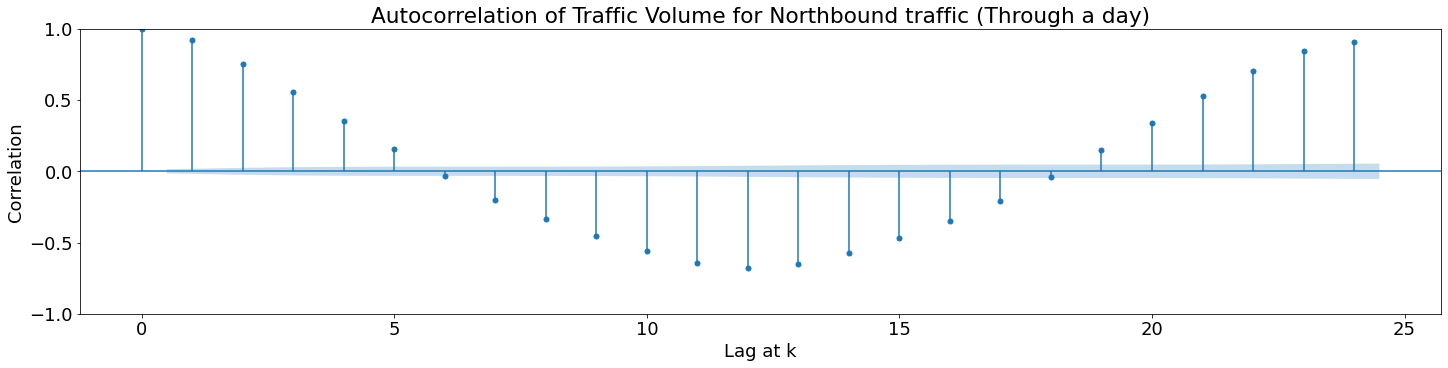

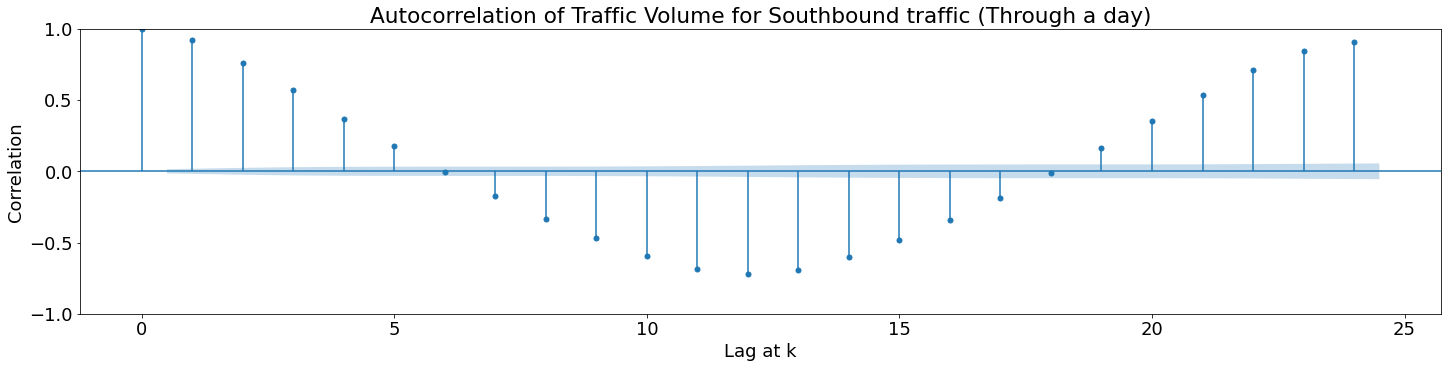

In [56]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

rcParams["figure.figsize"] = 20, 5
fig = plot_acf(df_north["northBound"], lags=24)

plt.title("Autocorrelation of Traffic Volume for Northbound traffic (Through a day)")
plt.ylabel("Correlation")
plt.xlabel("Lag at k")
fig.show()

rcParams["figure.figsize"] = 20, 5
fig = plot_acf(df_south["southBound"], lags=24)

plt.title("Autocorrelation of Traffic Volume for Southbound traffic (Through a day)")
plt.ylabel("Correlation")
plt.xlabel("Lag at k")
fig.show()

# rcParams["figure.figsize"] = 20, 5
# fig = plot_acf(df_north["northBound"], lags=24)

# plt.title("Autocorrelation of Traffic Volume for Northbound traffic (Through a day)")
# plt.ylabel("Correlation")
# plt.xlabel("Lag at k")
# fig.show()

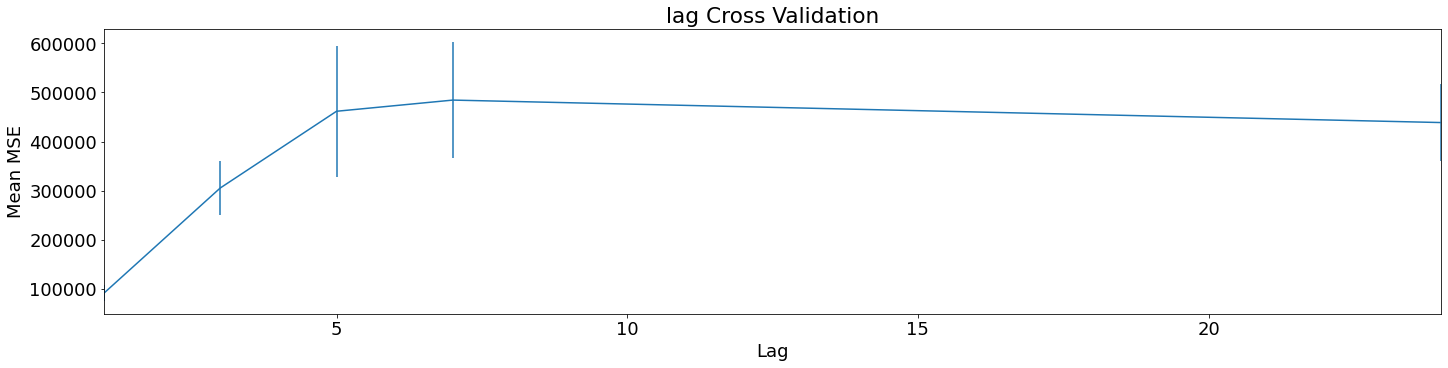

Base MSE for northBound traffic is: 303.2501825866016
Base MSE for northBound traffic is: 276.5886857578826
Base MSE for northBound traffic is: 269.5241398149803
Base MSE for northBound traffic is: 265.77272219908343
Base MSE for northBound traffic is: 263.420520520926
Base MSE for northBound traffic is: 262.53228617245117
Base MSE for northBound traffic is: 257.94855422561636
Base MSE for northBound traffic is: 256.8553119219366
Base MSE for northBound traffic is: 259.2187991386425


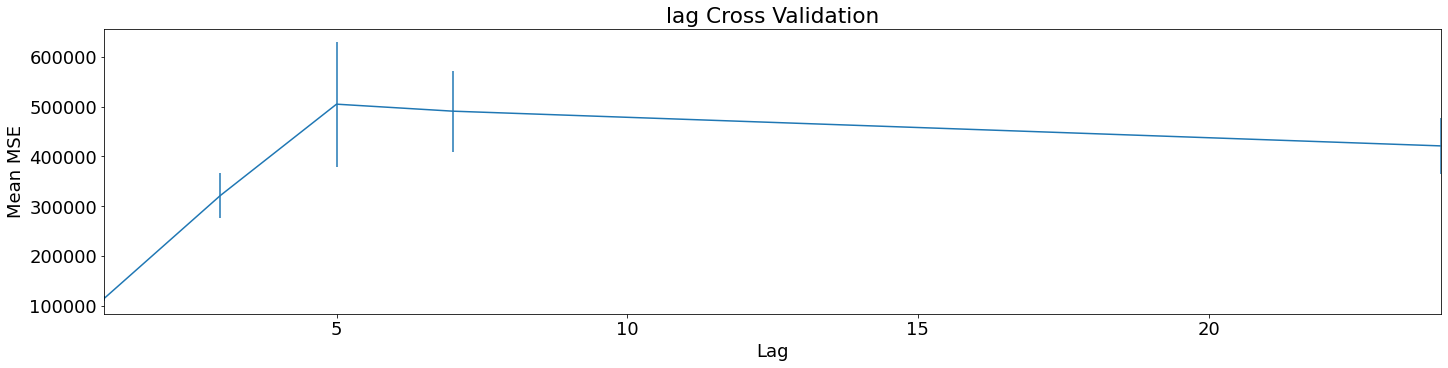

In [57]:
temp = df_north.copy()
cross_validation_feature_params(test_params=[1,3,5,7,24], df=temp, feature_type="lag", target_var="northBound")

temp_south = df_south.copy()
cross_validation_feature_params(test_params=[1,3,5,7,24], df=temp_south, feature_type="lag", target_var="southBound")

# Hour
temp["volume_lag_1"] = temp["northBound"].shift(1, fill_value=0)
performance(temp, "northBound")
temp["volume_lag_2"] = temp["northBound"].shift(2, fill_value=0)
performance(temp, "northBound")
temp["volume_lag_3"] = temp["northBound"].shift(3, fill_value=0)
performance(temp, "northBound")
temp["volume_lag_4"] = temp["northBound"].shift(4, fill_value=0)
performance(temp, "northBound")
temp["volume_lag_5"] = temp["northBound"].shift(5, fill_value=0)
performance(temp, "northBound")
temp["volume_lag_6"] = temp["northBound"].shift(6, fill_value=0)
performance(temp, "northBound")
# Difference features
temp["volume_lag_1_diff"] = temp["volume_lag_1"] - temp["northBound"].shift(2, fill_value=0)
performance(temp, "northBound")
# 12 hours
temp["volume_lag_halfday"] = temp["northBound"].shift(12, fill_value=0)
performance(temp, "northBound")
# Day
temp["volume_lag_24"] = temp["northBound"].shift(24, fill_value=0)
performance(temp, "northBound")
# # Week
# temp["volume_lag_week"] = temp["northBound"].shift(168, fill_value=0)
# performance(temp, "northBound")


Set lags, and a difference

In [58]:
df_north = df.drop(columns=["southBound"])
df_south = df.drop(columns=["northBound"])

df_north = df.drop(columns=["southBound"])
df_north["volume_lag_1"] = df_north["northBound"].shift(1, fill_value=0)
df_north["volume_lag_2"] = df_north["northBound"].shift(2, fill_value=0)
df_north["volume_lag_3"] = df_north["northBound"].shift(3, fill_value=0)
df_north["volume_lag_4"] = df_north["northBound"].shift(4, fill_value=0)
df_north["volume_lag_5"] = df_north["northBound"].shift(5, fill_value=0)
df_north["volume_lag_6"] = df_north["northBound"].shift(6, fill_value=0)
df_north["volume_lag_12"] = df_north["northBound"].shift(12, fill_value=0)
df_north["volume_lag_1_diff"] = df_north["volume_lag_1"] - df_north["northBound"].shift(2, fill_value=0)
performance(df_north, "northBound")

df_south = df.drop(columns=["northBound"])
df_south["volume_lag_1"] = df_south["southBound"].shift(1, fill_value=0)
df_south["volume_lag_2"] = df_south["southBound"].shift(2, fill_value=0)
df_south["volume_lag_3"] = df_south["southBound"].shift(3, fill_value=0)
df_south["volume_lag_4"] = df_south["southBound"].shift(4, fill_value=0)
df_south["volume_lag_5"] = df_south["southBound"].shift(5, fill_value=0)
df_south["volume_lag_6"] = df_south["southBound"].shift(6, fill_value=0)
df_south["volume_lag_12"] = df_south["southBound"].shift(12, fill_value=0)
df_south["volume_lag_1_diff"] = df_south["volume_lag_1"] - df_south["southBound"].shift(2, fill_value=0)
performance(df_south, "southBound")

Base MSE for northBound traffic is: 259.540094284496
Base MSE for southBound traffic is: 312.317221740954


Interesting that the southbound performance doesnt improve to the same extent

Rolling window stuff is more or less ignored, I think we're alright with just lags for this report.

Base MSE for northBound traffic is: 204.67601189140294


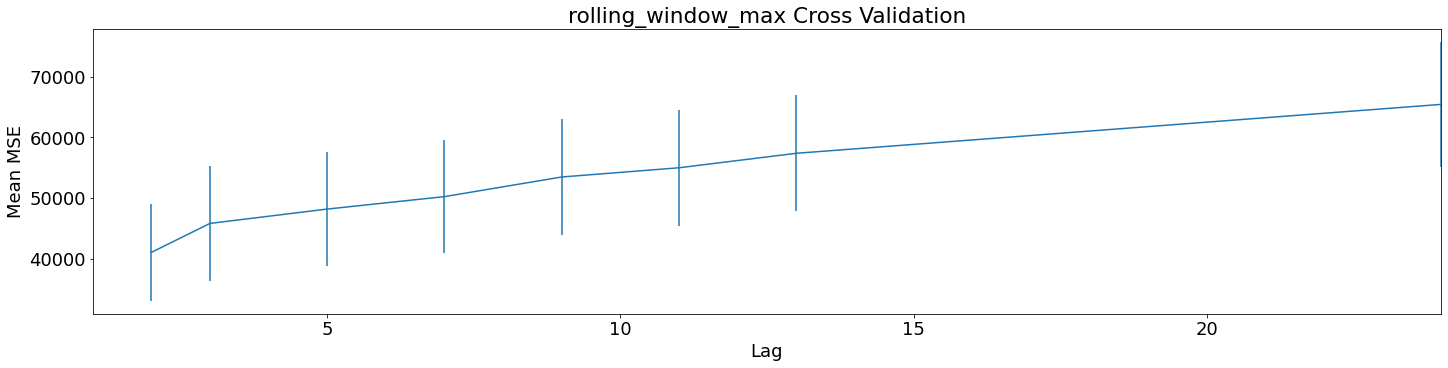

In [59]:
temp = df_north.copy()
cross_validation_feature_params(test_params=[2,3,5,7,9,11,13,24], df=temp, feature_type="rolling_window_max", target_var="northBound")
temp['window_max'] = temp['northBound'].rolling(window = 2).max()
temp['window_max'] = temp['window_max'].fillna(0)
performance(temp, "northBound")




Lower error again with the rolling window. Try mean rolling window

Base MSE for northBound traffic is: 168.61530768052333


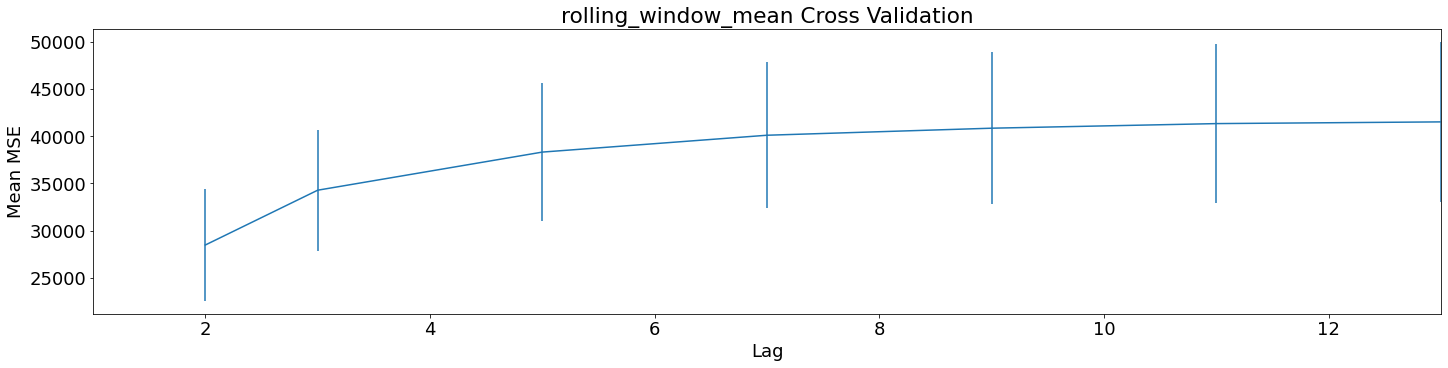

In [60]:
temp_a = df_north.copy()
cross_validation_feature_params(test_params=[2,3,5,7,9,11,13], df=temp, feature_type="rolling_window_mean", target_var="northBound")
temp['window_mean'] = temp['northBound'].rolling(window = 2).mean()
temp['window_mean'] = temp['window_mean'].fillna(0)
performance(temp, "northBound")

Much better again! See if min does any better

Base MSE for northBound traffic is: 194.82439860893652


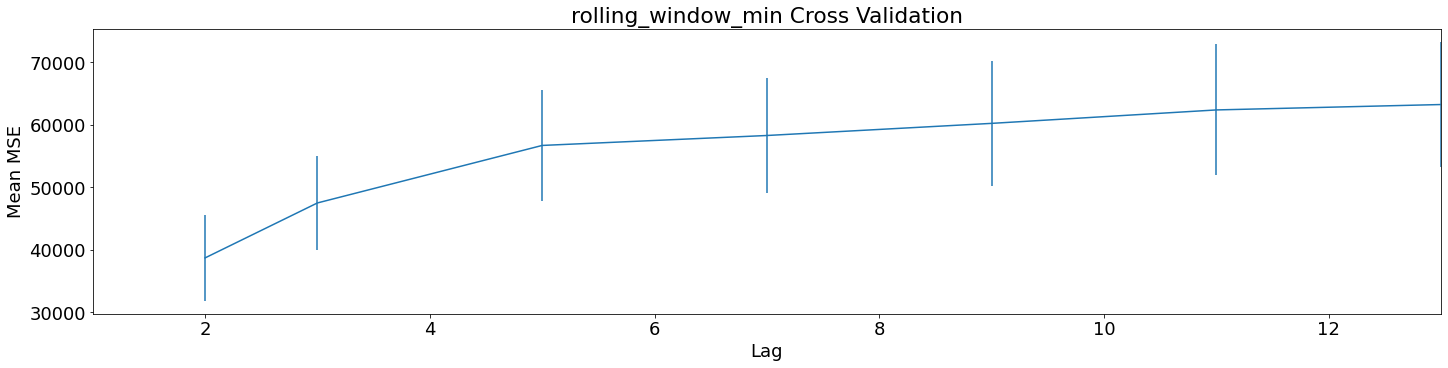

In [61]:
temp = df_north.copy()
cross_validation_feature_params(test_params=[2,3,5,7,9,11,13], df=temp, feature_type="rolling_window_min", target_var="northBound")
temp['window_min'] = temp['northBound'].rolling(window = 2).min()
temp['window_min'] = temp['window_min'].fillna(0)
performance(temp, "northBound")

In [62]:
df_north

,dayOfWeek,month,time,northBound,volume_lag_1,volume_lag_2,volume_lag_3,volume_lag_4,volume_lag_5,volume_lag_6,volume_lag_12,volume_lag_1_diff
datetime,,,,,,,,,,,,
2017-01-01 00:00:00,7,1,0,451.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 01:00:00,7,1,100,652.0,451.0,0.0,0.0,0.0,0.0,0.0,0.0,451.0
2017-01-01 02:00:00,7,1,200,527.0,652.0,451.0,0.0,0.0,0.0,0.0,0.0,201.0
2017-01-01 03:00:00,7,1,300,462.0,527.0,652.0,451.0,0.0,0.0,0.0,0.0,-125.0
2017-01-01 04:00:00,7,1,400,514.0,462.0,527.0,652.0,451.0,0.0,0.0,0.0,-65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,1,12,1900,2211.0,2691.0,3268.0,3842.0,4033.0,4306.0,4067.0,2123.0,-577.0
2018-12-31 20:00:00,1,12,2000,1766.0,2211.0,2691.0,3268.0,3842.0,4033.0,4306.0,2357.0,-480.0
2018-12-31 21:00:00,1,12,2100,1092.0,1766.0,2211.0,2691.0,3268.0,3842.0,4033.0,2510.0,-445.0


Not quite as good.

Let's add the mean rolling window as a feature. These will be added once we've figured out how to use em for forecasting. They do a pretty nice job though.

In [63]:
# # Northbound
# df_north['window_mean'] = df_north['northBound'].rolling(window = 2).mean()
# df_north['window_mean'] = df_north['window_mean'].fillna(0)
# performance(df_north, "northBound")
# # Southbound
# df_south['window_mean'] = df_south['southBound'].rolling(window = 2).mean()
# df_south['window_mean'] = df_south['window_mean'].fillna(0)
# performance(df_south, "southBound")

We see better performance as we dont have the cross validated features also in the dataframe. 
This performance is particularly good for such a basic model!

## Model Training

We're going to try a few different models provided by sklearn. We could look beyond into things like Keras, ARIMA and XGBOOST, but I don't think it's necessary for this assignment.


Hold out a validation set. This will be used later once we've narrowed down the params for each model.

In [64]:
# We're going to hold out 12 hours of data points to predict on!~
def train_test_split(X,y,test_size):
	return (X[:-test_size, :], X[-test_size:, :], y[:-test_size], y[-test_size:])

In [65]:


# Forecast size
n_forecast = 24*30
lag_range = 12

In [66]:




# 12-previous points
lagged_points = df_north.to_numpy()[-12-lag_range-1:-12]  # This gives us last twelve rows of training data
lagged_points = lagged_points[
    :, 3
]  # Get the volume for each row, these are our lagged points


# Target Variable
y_north = df_north["northBound"].to_numpy()
y_south = df_south["southBound"].to_numpy()

# Feature Vectors
X_north = df_north.drop(columns=["northBound"]).to_numpy()
X_south = df_south.drop(columns=["southBound"]).to_numpy()


# Hold out a validation set
(X_north, X_north_val, y_north, y_north_val) = train_test_split(X_north, y_north, test_size=n_forecast)
(X_south, X_south_val, y_south, y_south_val) = train_test_split(X_south, y_south, test_size=n_forecast)



So, let's look into Lasso and Ridge Regression first.

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+07, tolerance: 1.065e+06
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.180e+07, tolerance: 2.156e+06
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.371e+07, tolerance: 3.292e+06
  model = cd_fast.enet_

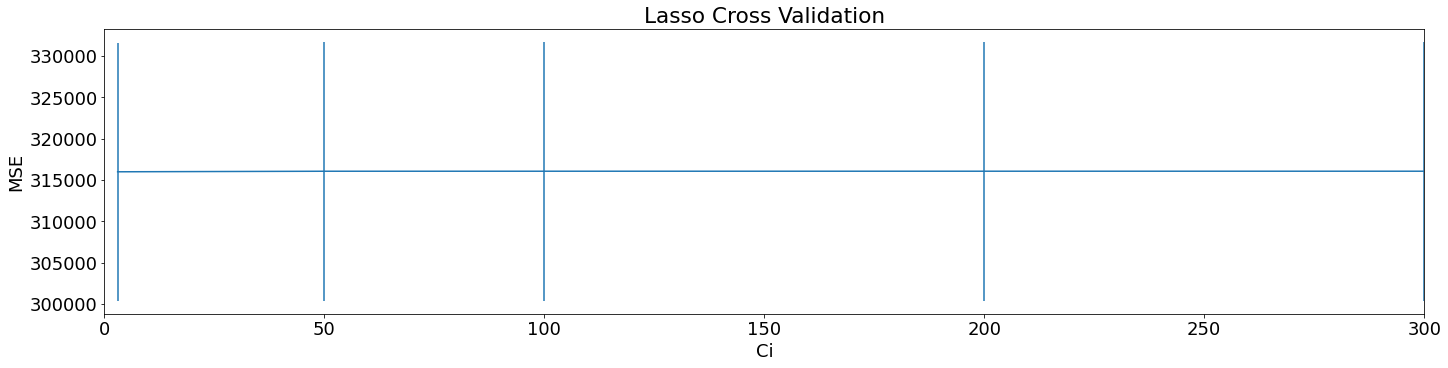

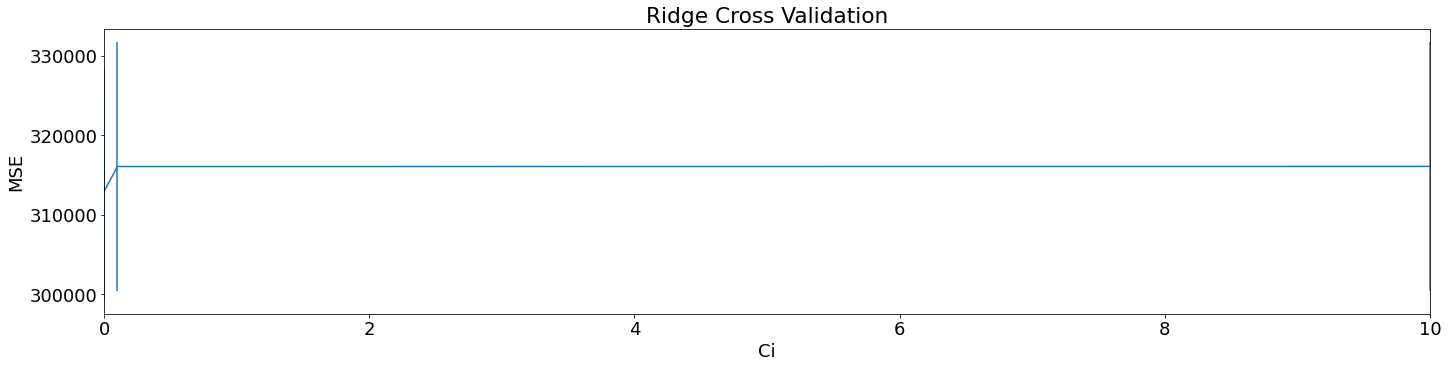

In [67]:
from models import evaluate_lasso_hyperparams, evaluate_ridge_hyperparams
evaluate_lasso_hyperparams(X_north,y_north, [3,50,100,200,300])
evaluate_ridge_hyperparams(X_north,y_north, [0.000001,0.0001,0.1,10])


Pretty awful performance lol. Not really surprising though. What is surprising is how well kNN does...

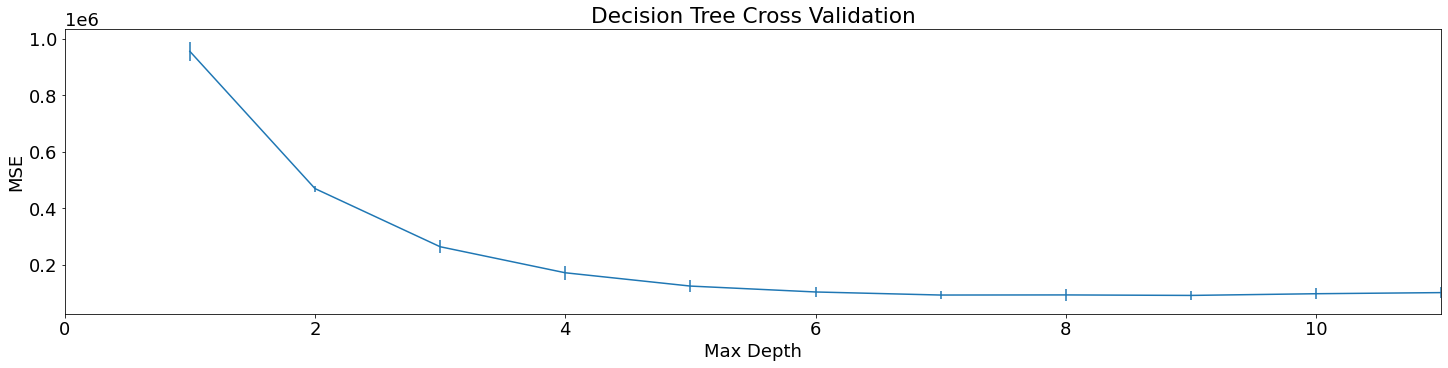

In [68]:
from models import evaluate_decision_tree_hyperparams
decision_tree_model=evaluate_decision_tree_hyperparams(X_north,y_north, [i for i in range(1,12)])

A Max Depth of 6 looks good here

In [69]:
from sklearn.tree import DecisionTreeRegressor
from forecasting import n_one_step_ahead_prediction
from sklearn.metrics import mean_squared_error
from visualisation import visualise_forecast_vs_true
from sklearn.model_selection import cross_validate, TimeSeriesSplit
import numpy as np



decision_tree_model=DecisionTreeRegressor(max_depth=6)
decision_tree_model.fit(X_north,y_north)

cv =TimeSeriesSplit(5)
scores = cross_validate(
        decision_tree_model,
        X_north,
        y_north,
        cv=cv,
        scoring="neg_mean_squared_error",
        return_estimator=True,
    )

base_mse = np.sqrt(-np.mean(scores["test_score"]))
print(f"MSE is: {format(base_mse)}")


MSE is: 320.68053071857327


Lets try build on our decision tree using AdaBoost
Tuning parameters takes a while so I'll leave it commented out

In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

from models import evaluate_ada_boost_hyperparams
from utilities import get_decision_tree_models

params_grid={
    "base_estimator": [model for model in get_decision_tree_models(max_depth_array=range(1,20))],
    "n_estimators":[i for i in range(5,150,5)],
    "learning_rate":[0.01,0.1,1,1.5,2,5,10],
    "loss":['linear', 'square', 'exponential']
}

#evaluate_ada_boost_hyperparams(X_north,y_north,params_grid) 

In [71]:
ada_boost_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=15),
    n_estimators=90,
    learning_rate=0.01,
    loss='exponential')

ada_boost_model.fit(X_north,y_north)

scores = cross_validate(
        ada_boost_model,
        X_north,
        y_north,
        cv=cv,
        scoring="neg_mean_squared_error",
        return_estimator=True,
    )

base_mse = np.sqrt(-np.mean(scores["test_score"]))
print(f"Ada Boost Performance MSE is: {format(base_mse)}")


Ada Boost Performance MSE is: 249.56669493677904


Bit better than the original decision tree..

Random Grid search to find the best combination of params for a random forest.
With those best params, we then test the performance. Takes a while...

In [72]:
from models import evaluate_random_forest_hyperparams
test_params = {
"n_estimators": [20, 50, 60, 100],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [i for i in range(5,20)]
}
#evaluate_random_forest_hyperparams(X_north, y_north, test_params)

In [73]:
# get a figure for the performance
from sklearn.ensemble import RandomForestRegressor
cv = TimeSeriesSplit(n_splits=5)
rf_model = RandomForestRegressor(n_estimators=60, max_features="auto",max_depth=14)
scores = cross_validate(
        rf_model,
        X_north,
        y_north,
        cv=cv,
        scoring="neg_mean_squared_error",
        return_estimator=True,
    )

base_mse = np.sqrt(-np.mean(scores["test_score"]))
print(f"MSE is: {format(base_mse)}")

MSE is: 247.6111202401036


Let's get the best hyper params for an ANN. We'll plot the error bars for it since the slides do it. Takes about six minutes to run... Comment it out then run it once everything else is done.

In [74]:
# from models import evaluate_MLP_hidden_nodes, evaluate_MLP_penalty_weight
# evaluate_MLP_hidden_nodes(X_north,y_north, [5,10,15,30,50,100])
# evaluate_MLP_penalty_weight(X_north,y_north, [0.1,1,10,100,1000])

## Validation
1. KNN


1892908.6159953058


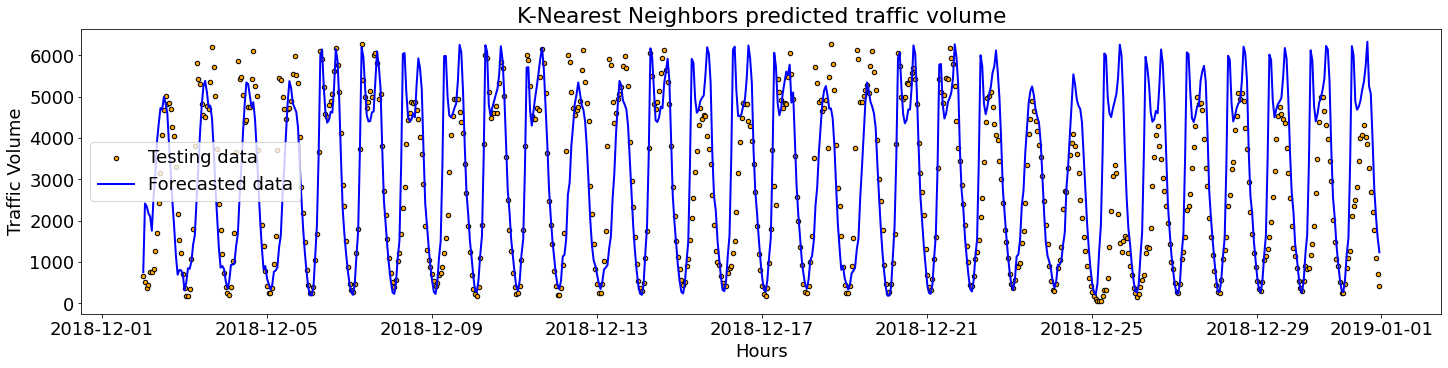

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from forecasting import n_one_step_ahead_prediction
from sklearn.metrics import mean_squared_error
knn_model = KNeighborsRegressor(weights="distance").fit(X_north, y_north)
y_forecast_north = n_one_step_ahead_prediction(knn_model, X_north_val, n_forecast, lagged_points, relevant_lag_indexes=[0,1,2,3,4,5,11])
print(mean_squared_error(y_north_val, y_forecast_north))

# Visualise
from visualisation import visualise_forecast_vs_true
x_axis = df_north.iloc[-n_forecast:].index.to_numpy()
visualise_forecast_vs_true(x_axis, y_north_val, y_forecast_north, model_name="K-Nearest Neighbors")

2. Decision Tree

MSE: 991019.5199910246


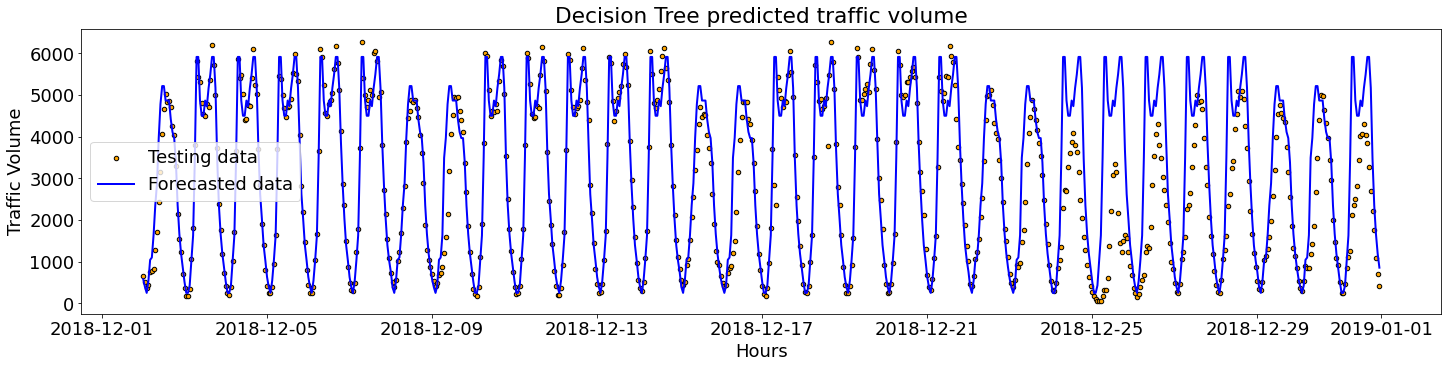

In [76]:
from sklearn.tree import DecisionTreeRegressor
y_forecast_north = n_one_step_ahead_prediction(decision_tree_model, X_north_val, n_forecast, lagged_points, relevant_lag_indexes=[0,1,2,3,4,5,11])
print("MSE: "+str(mean_squared_error(y_north_val, y_forecast_north)))
#x_axis = df.iloc[-n_forecast:].index.to_numpy()
visualise_forecast_vs_true(x_axis,y_north_val,y_forecast_north,"Decision Tree")

2. Ada Boost

MSE: 785899.2931761789


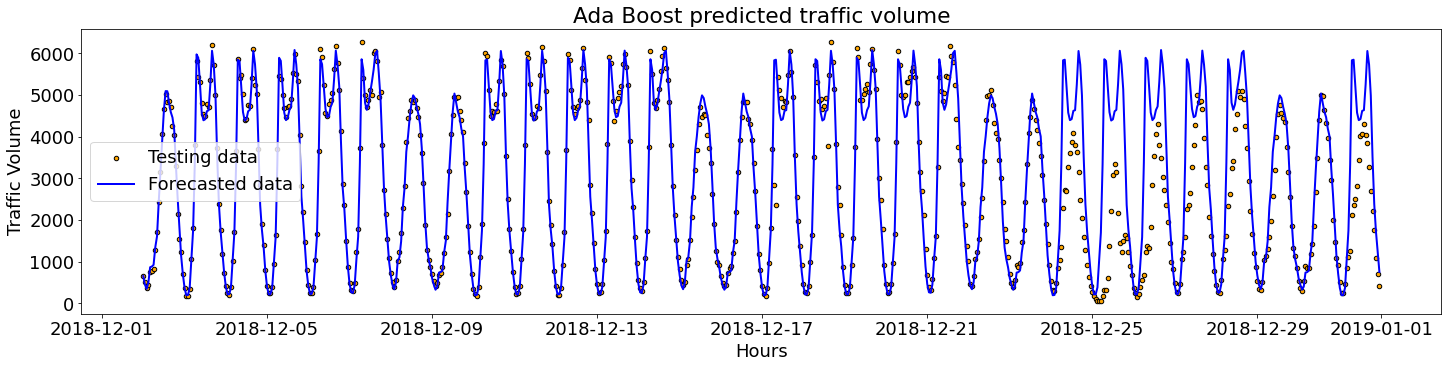

In [77]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=15),
    n_estimators=90,
    learning_rate=0.01,
    loss='exponential').fit(X_north,y_north)
y_forecast_north = n_one_step_ahead_prediction(ada_boost_model, X_north_val, n_forecast, lagged_points, relevant_lag_indexes=[0,1,2,3,4,5,11])
print("MSE: "+str(mean_squared_error(y_north_val, y_forecast_north)))
#x_axis = df.iloc[-n_forecast:].index.to_numpy()
visualise_forecast_vs_true(x_axis,y_north_val,y_forecast_north,"Ada Boost")

3. Random Forest

773738.8267963576


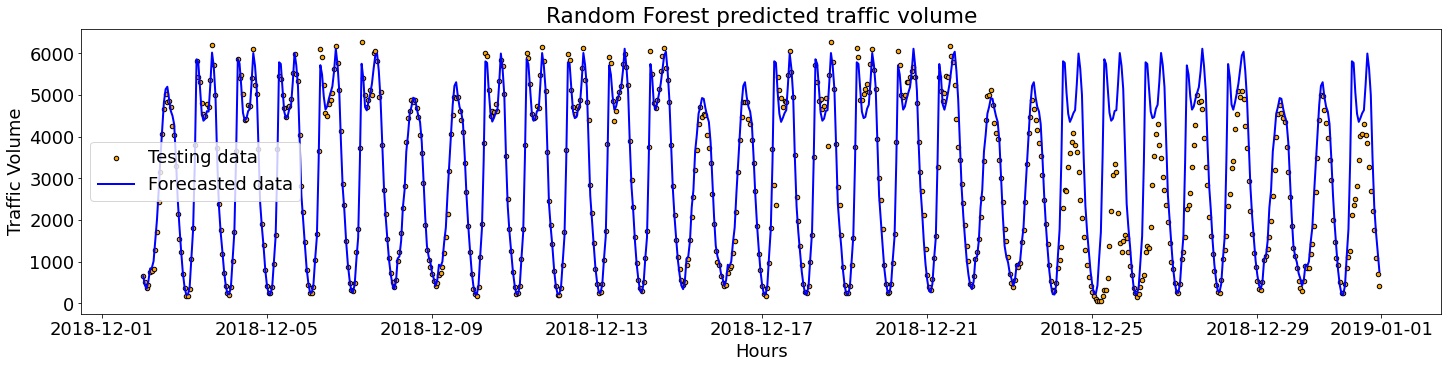

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=60, max_features="auto",max_depth=14).fit(X_north, y_north)
y_forecast_north = n_one_step_ahead_prediction(rf_model, X_north_val, n_forecast, lagged_points, relevant_lag_indexes=[0,1,2,3,4,5,11])
print(mean_squared_error(y_north_val, y_forecast_north))

# Visualise this
visualise_forecast_vs_true(x_axis, y_north_val, y_forecast_north, model_name="Random Forest")

If the results are bad, try again and it'll probably change

4. Neural Network

10528789.648466988


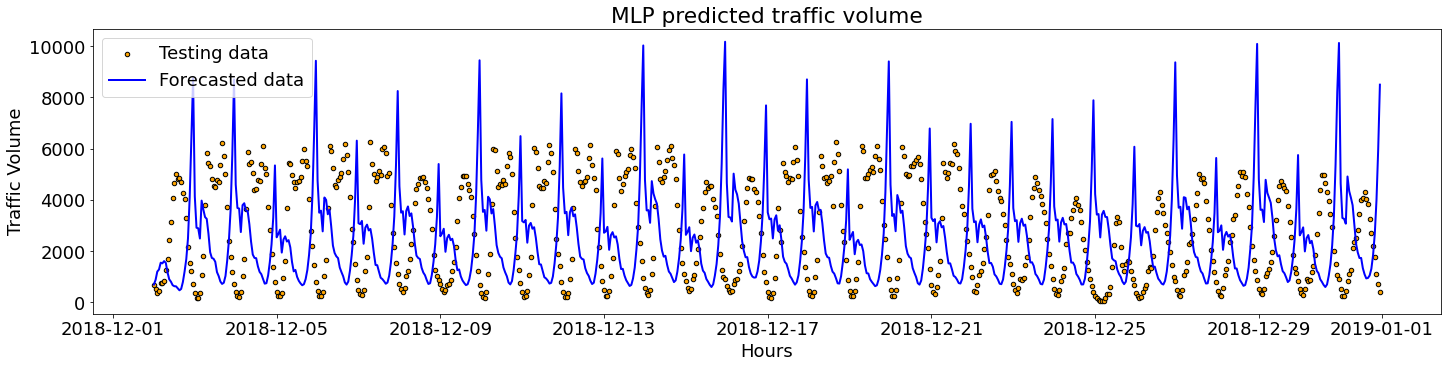

In [79]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=100, alpha=1000,max_iter=500).fit(X_north, y_north)
y_forecast_north = n_one_step_ahead_prediction(mlp_model, X_north_val, n_forecast, lagged_points, relevant_lag_indexes=[0,1,2,3,4,5,11])
print(mean_squared_error(y_north_val, y_forecast_north))
visualise_forecast_vs_true(x_axis, y_north_val, y_forecast_north, model_name="MLP")



Lets re-train our model 12 times (for each month) so we can forecast for each month and compare the results

In [80]:
from models import get_and_print_test_and_validation_MSE
import pandas as pd
import copy

test_scores={}
test_scores["Decision Tree"]={}
test_scores["kNN"]={}
test_scores["Ada Boost"]={}
test_scores["ANN"]={}

val_month_scores=copy.deepcopy(test_scores)
val_week_scores=copy.deepcopy(test_scores)

for month_index in range(11,-1,-1):
    df_north_temp=df_north.copy()
    df_south_temp=df_south.copy()

    #start by removing 0 days for december, 
    remove_rows=24*30*month_index
    if(month_index!=0):
        df_north_temp=df_north_temp[:-remove_rows]
        df_south_temp=df_south[:-remove_rows]
    
    # 12-previous points
    lagged_points = df_north_temp.to_numpy()[-12-lag_range-1:-12]  # This gives us last twelve rows of training data
    lagged_points = lagged_points[
        :, 3
    ]  # Get the volume for each row, these are our lagged points


    # Target Variable
    y_north_temp = df_north_temp["northBound"].to_numpy()
    y_south_temp = df_south_temp["southBound"].to_numpy()

    # Feature Vectors
    X_north_temp = df_north_temp.drop(columns=["northBound"]).to_numpy()
    X_south_temp = df_south_temp.drop(columns=["southBound"]).to_numpy()


    # Hold out a validation set
    (X_north_temp, X_north_val_temp, y_north_temp, y_north_val_temp) = train_test_split(X_north_temp, y_north_temp, test_size=n_forecast)
    (X_south_temp, X_south_val_temp, y_south_temp, y_south_val_temp) = train_test_split(X_south_temp, y_south_temp, test_size=n_forecast)
    
    
    get_and_print_test_and_validation_MSE(test_scores,val_month_scores,val_week_scores,"kNN",knn_model,X_north_temp,y_north_temp,X_north_val_temp,y_north_val_temp,n_forecast,lagged_points,month_index)
    get_and_print_test_and_validation_MSE(test_scores,val_month_scores,val_week_scores,"Decision Tree",decision_tree_model,X_north_temp,y_north_temp,X_north_val_temp,y_north_val_temp,n_forecast,lagged_points,month_index)
    get_and_print_test_and_validation_MSE(test_scores,val_month_scores,val_week_scores,"AdaBoost",ada_boost_model,X_north_temp,y_north_temp,X_north_val_temp,y_north_val_temp,n_forecast,lagged_points,month_index)
    get_and_print_test_and_validation_MSE(test_scores,val_month_scores,val_week_scores,"Random Forest",rf_model,X_north_temp,y_north_temp,X_north_val_temp,y_north_val_temp,n_forecast,lagged_points,month_index)
    get_and_print_test_and_validation_MSE(test_scores,val_month_scores,val_week_scores,"ANN",mlp_model,X_north_temp,y_north_temp,X_north_val_temp,y_north_val_temp,n_forecast,lagged_points,month_index)


KeyError: 'AdaBoost'

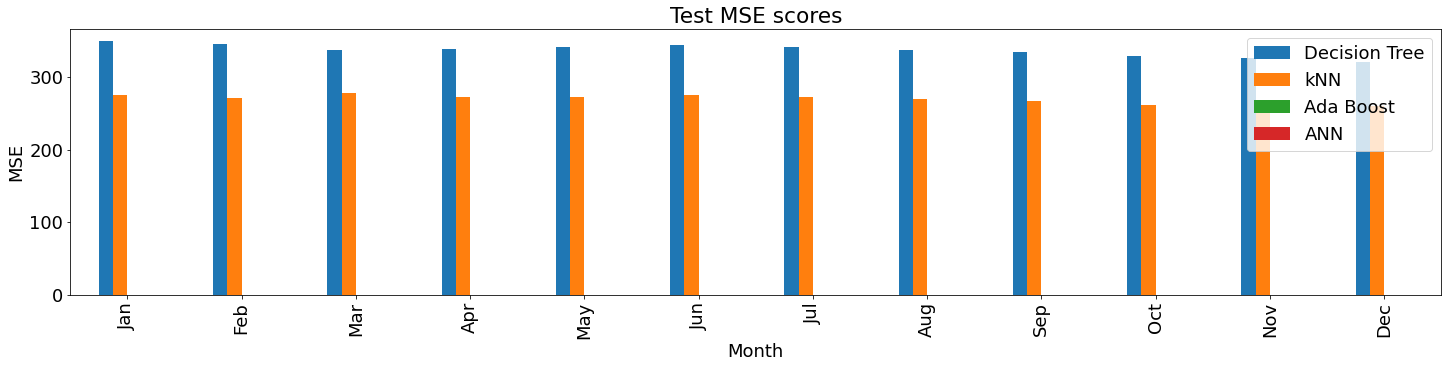

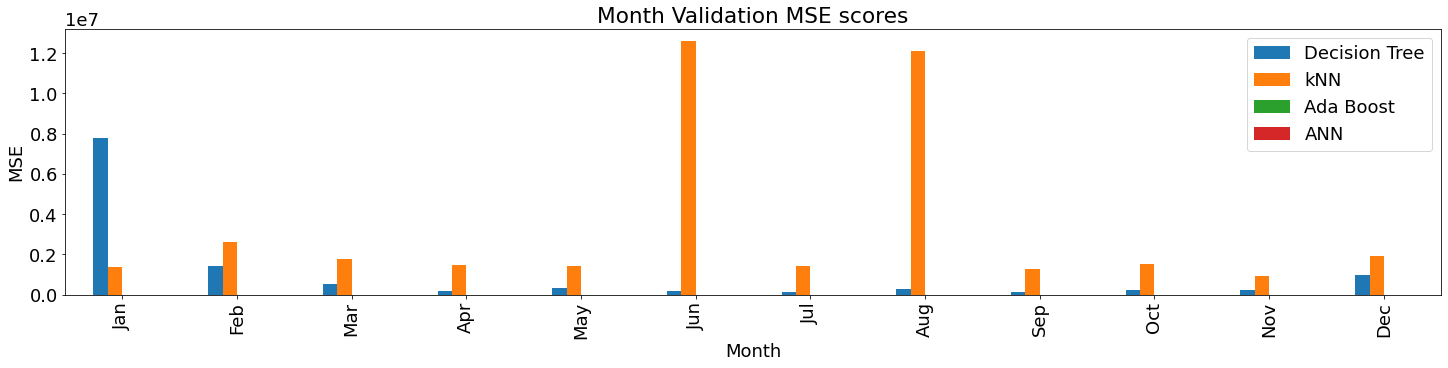

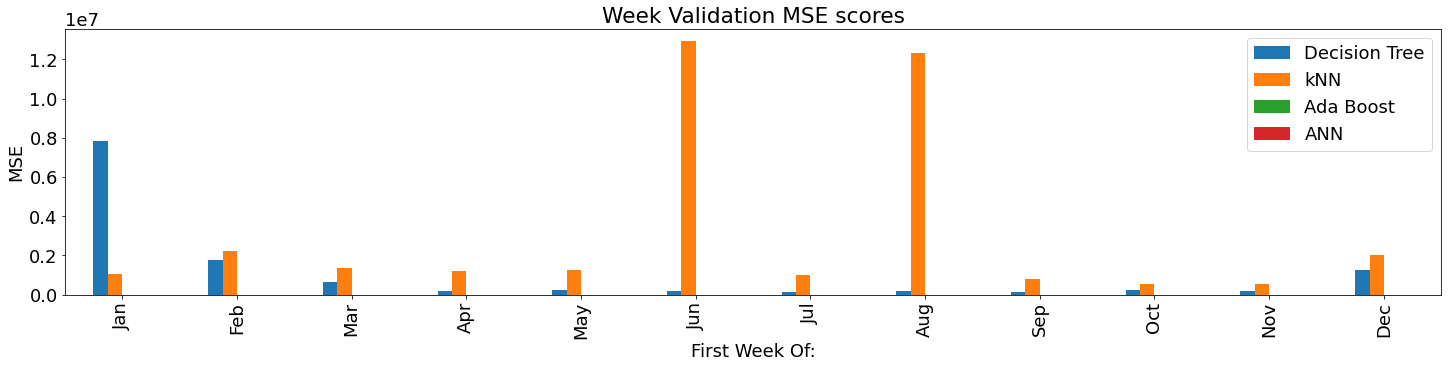

In [ ]:
from visualisation import forecast_plot

df_test_scores=pd.DataFrame(test_scores)
df_val_month_scores=pd.DataFrame(val_month_scores)
df_val_week_scores=pd.DataFrame(val_week_scores)


forecast_plot(df_test_scores,"Test MSE scores","Month")
forecast_plot(df_val_month_scores,"Month Validation MSE scores","Month")
forecast_plot(df_val_week_scores,"Week Validation MSE scores","First Week Of:")
